In [343]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

# Loading the dataset

In [344]:
# Loading the dataset
df = pd.read_csv('C:/Users/DELL/Downloads/heart1.csv')

# Explore dataset

In [345]:
# Explore dataset
df.shape

(340, 17)

In [346]:
df.columns

Index(['pid', 'age', 'sex', 'cp', 'trestbps', 'chol', 'famhist', 'fbs',
       'restecg', 'smoke', 'thalach', 'exang', 'oldpeak', 'slope', 'ca',
       'thal', 'target'],
      dtype='object')

In [347]:
df.dtypes

pid           int64
age           int64
sex          object
cp           object
trestbps      int64
chol          int64
famhist      object
fbs            bool
restecg      object
smoke        object
thalach       int64
exang        object
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [348]:
df.head()

,pid,age,sex,cp,trestbps,chol,famhist,fbs,restecg,smoke,thalach,exang,oldpeak,slope,ca,thal,target
0,1,63,M,Asymtomatic,145,233,no,True,normal,no,150,no,2.3,0,0,1,1
1,2,37,M,Non-Angina pain,130,250,no,False,ST-T wave abnormality,yes,187,no,3.5,0,0,2,1
2,3,41,F,Atypical Angina,130,204,no,False,normal,no,172,no,1.4,2,0,2,1
3,4,56,M,Atypical Angina,120,236,no,False,ST-T wave abnormality,no,178,no,0.8,2,0,2,1
4,5,51,F,Non-Angina pain,140,308,yes,False,NaN,yes,142,no,1.5,2,1,2,1


In [349]:
df.tail()

,pid,age,sex,cp,trestbps,chol,famhist,fbs,restecg,smoke,thalach,exang,oldpeak,slope,ca,thal,target
335,336,47,M,NaN,130,253,no,False,ST-T wave abnormality,no,179,no,0.0,2,0,2,1
336,337,51,M,NaN,125,213,no,False,normal,yes,125,yes,1.4,2,1,2,1
337,338,46,F,Non-Angina pain,142,177,yes,False,NaN,yes,160,yes,1.4,0,0,2,1
338,339,54,F,NaN,135,304,no,True,ST-T wave abnormality,yes,170,no,0.0,2,0,2,1
339,340,56,M,NaN,120,240,no,False,ST-T wave abnormality,yes,169,no,0.0,0,0,2,1


In [350]:
df.isnull().any()

pid         False
age         False
sex         False
cp           True
trestbps    False
chol        False
famhist     False
fbs         False
restecg      True
smoke       False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [351]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pid       340 non-null    int64  
 1   age       340 non-null    int64  
 2   sex       340 non-null    object 
 3   cp        322 non-null    object 
 4   trestbps  340 non-null    int64  
 5   chol      340 non-null    int64  
 6   famhist   340 non-null    object 
 7   fbs       340 non-null    bool   
 8   restecg   318 non-null    object 
 9   smoke     340 non-null    object 
 10  thalach   340 non-null    int64  
 11  exang     340 non-null    object 
 12  oldpeak   340 non-null    float64
 13  slope     340 non-null    int64  
 14  ca        340 non-null    int64  
 15  thal      340 non-null    int64  
 16  target    340 non-null    int64  
dtypes: bool(1), float64(1), int64(9), object(6)
memory usage: 43.0+ KB


In [352]:
print(df.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
pid         0.699924
thalach     0.448531
oldpeak     0.436794
ca          0.344310
slope       0.341610
thal        0.333058
age         0.230205
trestbps    0.119044
chol        0.086314
fbs         0.035609
Name: target, dtype: float64


# 1. Data Preprocessing

# 1.1 Data Cleaning (Handling Missing Values)

In [353]:
# Data Cleaning (Handling Missing Values)
df.dropna(inplace= True)

# 1.2 Data Reduction

In [354]:
# Data Reduction
df.drop(['pid','smoke','famhist'],axis='columns', inplace=True)

In [355]:
df.shape

(303, 14)

In [356]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,M,Asymtomatic,145,233,True,normal,150,no,2.3,0,0,1,1
1,37,M,Non-Angina pain,130,250,False,ST-T wave abnormality,187,no,3.5,0,0,2,1
2,41,F,Atypical Angina,130,204,False,normal,172,no,1.4,2,0,2,1
3,56,M,Atypical Angina,120,236,False,ST-T wave abnormality,178,no,0.8,2,0,2,1
8,57,F,Typical Angina,120,354,False,ST-T wave abnormality,163,yes,0.6,2,0,2,1


# 1.3 Data Encoding

In [357]:
# Data Encoding
df.loc[df["sex"] == "M", "sex"] = 1
df.loc[df["sex"] == "F", "sex"] = 0

In [358]:
df.loc[df["cp"] == "Typical Angina", "cp"] = 1
df.loc[df["cp"] == "Atypical Angina", "cp"] =2 
df.loc[df["cp"] == "Non-Angina pain", "cp"] =3 
df.loc[df["cp"] == "Asymtomatic", "cp"] =4

In [359]:
df.loc[df["restecg"] == "normal", "restecg"] =0
df.loc[df["restecg"] == "ST-T wave abnormality", "restecg"] =1
df.loc[df["restecg"] == "left ventricular hypertrophy", "restecg"] =2

In [360]:
df.fbs = df.fbs.astype('int') 
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs           int32
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [361]:
df.loc[df["exang"] == "no", "exang"] =0
df.loc[df["exang"] == "yes", "exang"] =1

In [362]:
print(df.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
age         0.225439
trestbps    0.144931
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


# Analysing various features of dataset.

# 1. Analyze 'thal'

In [363]:
df["thal"].unique()



array([1, 2, 3, 0], dtype=int64)

### Countplot:

<AxesSubplot:xlabel='thal', ylabel='count'>

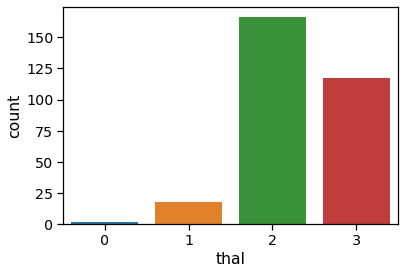

In [364]:
sns.countplot(x=df["thal"])

### Barplot:

<AxesSubplot:xlabel='thal', ylabel='target'>

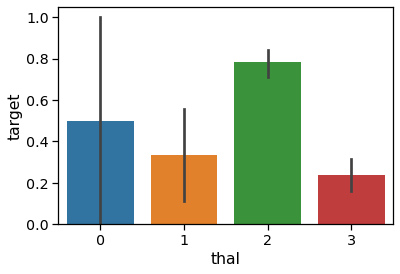

In [365]:
sns.barplot(x = df["thal"],y = df["target"])

# 2. Analyze "sex"

In [366]:
df["sex"].unique()

array([1, 0], dtype=object)

### Countplot:

<AxesSubplot:xlabel='sex', ylabel='count'>

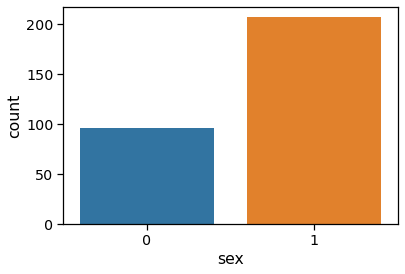

In [367]:
sns.countplot(x=df["sex"])

### Barplot:

<AxesSubplot:xlabel='sex', ylabel='target'>

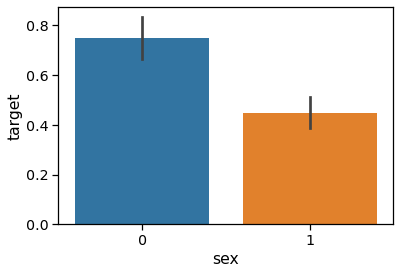

In [368]:
sns.barplot(x=df["sex"],y=df["target"])

# 3. Analyze "ca".

In [369]:
df["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

### Countplot:

<AxesSubplot:xlabel='ca', ylabel='count'>

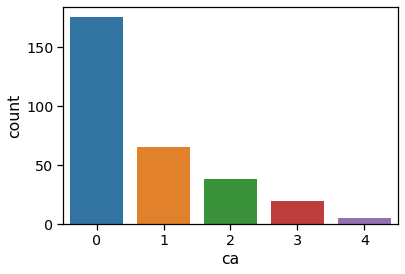

In [370]:
sns.countplot(x=df["ca"])

### Barplot:

<AxesSubplot:xlabel='ca', ylabel='target'>

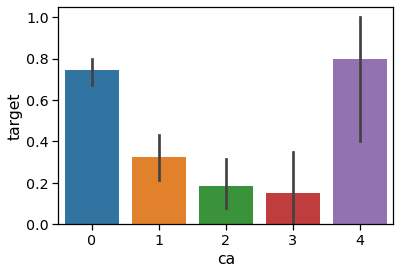

In [371]:
sns.barplot(x=df["ca"],y=df["target"])

# 4. Analyze "cp"

In [372]:
df["cp"].unique()

array([4, 3, 2, 1], dtype=object)

### Countplot:

<AxesSubplot:xlabel='cp', ylabel='count'>

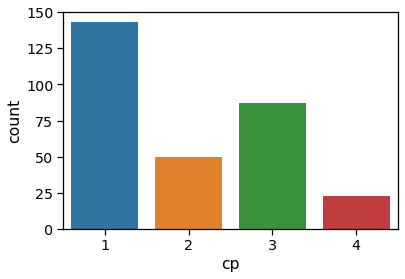

In [373]:
sns.countplot(x=df["cp"])

### Barplot:

<AxesSubplot:xlabel='cp', ylabel='target'>

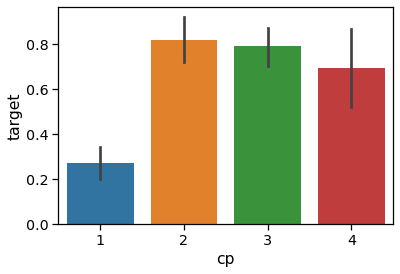

In [374]:
sns.barplot(x=df["cp"],y=df["target"])

# 5. Analyze "slope"

In [375]:
df["slope"].unique()

array([0, 2, 1], dtype=int64)

### Countplot:

<AxesSubplot:xlabel='slope', ylabel='count'>

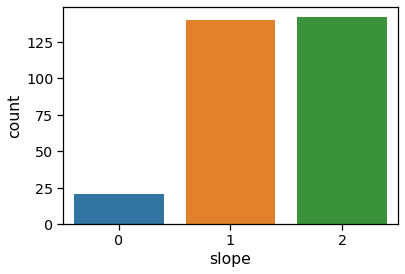

In [376]:
sns.countplot(x=df["slope"])

### Barplot:

<AxesSubplot:xlabel='slope', ylabel='target'>

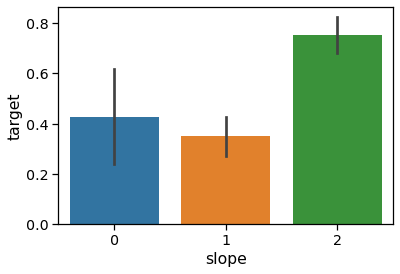

In [377]:
sns.barplot(x=df["slope"],y=df["target"])

# 6. Analyze "fbs"

In [378]:
df["fbs"].unique()

array([1, 0])

### Countplot:

<AxesSubplot:xlabel='fbs', ylabel='count'>

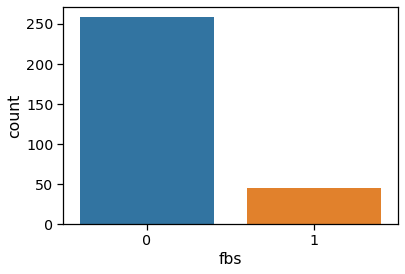

In [379]:
sns.countplot(x=df["fbs"])

### Barplot:

<AxesSubplot:xlabel='fbs', ylabel='target'>

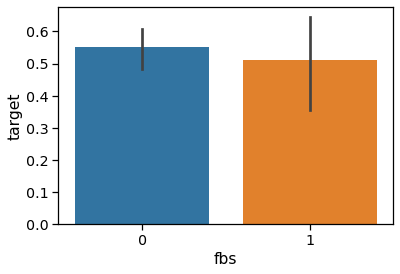

In [380]:
sns.barplot(x=df["fbs"],y=df["target"])

# 7. Analyze "exang"

In [381]:
df["exang"].unique()

array([0, 1], dtype=object)

### Countplot:

<AxesSubplot:xlabel='exang', ylabel='count'>

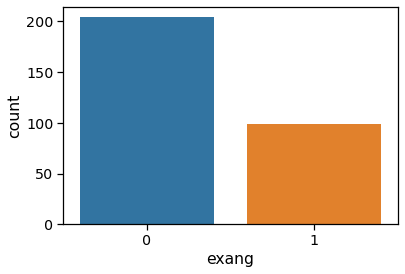

In [382]:
sns.countplot(x=df["exang"])

### Barplot:

<AxesSubplot:xlabel='exang', ylabel='target'>

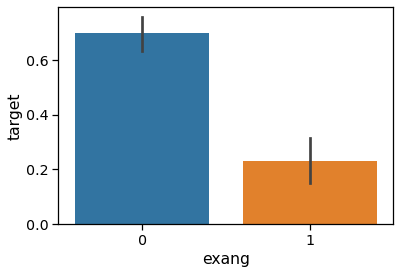

In [383]:
sns.barplot(x=df["exang"],y=df["target"])

# 8. Analyze "restecg"

In [384]:
df["restecg"].unique()

array([0, 1, 2], dtype=object)

### Countplot:

<AxesSubplot:xlabel='restecg', ylabel='count'>

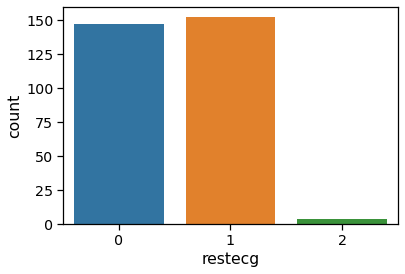

In [385]:
sns.countplot(x=df["restecg"])

### Barplot:

<AxesSubplot:xlabel='restecg', ylabel='target'>

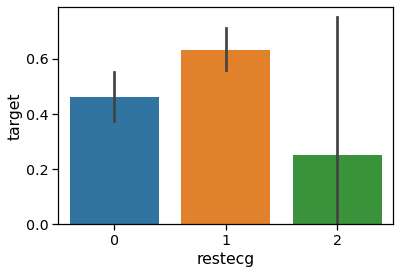

In [386]:
sns.barplot(x=df["restecg"],y=df["target"])

# Analyze the output variable

In [387]:
df["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [388]:
df["target"].unique()

array([1, 0], dtype=int64)

### Countplot:

<AxesSubplot:xlabel='target', ylabel='count'>

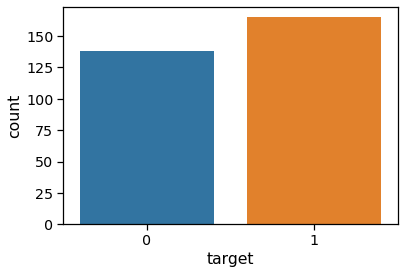

In [389]:
sns.countplot(x=df["target"])

# Again exploring the dataset

In [390]:
# Again exploring the dataset
df.shape

(303, 14)

In [391]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,4,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,3,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,2,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,2,120,236,0,1,178,0,0.8,2,0,2,1
8,57,0,1,120,354,0,1,163,1,0.6,2,0,2,1


In [392]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
329,59,1,1,164,176,1,0,90,0,1.0,1,2,1,0
330,57,0,1,140,241,0,1,123,1,0.2,1,0,3,0
331,45,1,4,110,264,0,1,132,0,1.2,1,0,3,0
332,68,1,1,144,193,1,1,141,0,3.4,1,2,3,0
333,57,1,1,130,131,0,1,115,1,1.2,1,1,3,0


In [393]:
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [394]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
329,59,1,1,164,176,1,0,90,0,1.0,1,2,1,0
330,57,0,1,140,241,0,1,123,1,0.2,1,0,3,0
331,45,1,4,110,264,0,1,132,0,1.2,1,0,3,0
332,68,1,1,144,193,1,1,141,0,3.4,1,2,3,0
333,57,1,1,130,131,0,1,115,1,1.2,1,1,3,0


# Dummy columns creation

In [395]:
dataset = pd.get_dummies(df, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [396]:
dataset.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_1', 'cp_2', 'cp_3', 'cp_4', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

# 1.4 Normalization

In [397]:
from sklearn.preprocessing import StandardScaler
standScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standScaler.fit_transform(dataset[columns_to_scale])

In [398]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
8,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [399]:
dataset.tail()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
329,0.511041,1.849101,-1.357886,-2.608388,-0.034166,0,0,1,1,0,...,0,0,0,1,0,0,0,1,0,0
330,0.290464,0.478391,-0.101730,-1.165281,-0.724323,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
331,-1.033002,-1.234996,0.342756,-0.771706,0.138373,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
332,1.503641,0.706843,-1.029353,-0.378132,2.036303,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
333,0.290464,-0.092738,-2.227533,-1.515125,0.138373,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


# Again explore the dataset

In [400]:
dataset.shape

(303, 31)

In [401]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 333
Data columns (total 31 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        303 non-null    float64
 1   trestbps   303 non-null    float64
 2   chol       303 non-null    float64
 3   thalach    303 non-null    float64
 4   oldpeak    303 non-null    float64
 5   target     303 non-null    int64  
 6   sex_0      303 non-null    uint8  
 7   sex_1      303 non-null    uint8  
 8   cp_1       303 non-null    uint8  
 9   cp_2       303 non-null    uint8  
 10  cp_3       303 non-null    uint8  
 11  cp_4       303 non-null    uint8  
 12  fbs_0      303 non-null    uint8  
 13  fbs_1      303 non-null    uint8  
 14  restecg_0  303 non-null    uint8  
 15  restecg_1  303 non-null    uint8  
 16  restecg_2  303 non-null    uint8  
 17  exang_0    303 non-null    uint8  
 18  exang_1    303 non-null    uint8  
 19  slope_0    303 non-null    uint8  
 20  slope_1   

In [402]:
dataset.isnull().sum()

age          0
trestbps     0
chol         0
thalach      0
oldpeak      0
target       0
sex_0        0
sex_1        0
cp_1         0
cp_2         0
cp_3         0
cp_4         0
fbs_0        0
fbs_1        0
restecg_0    0
restecg_1    0
restecg_2    0
exang_0      0
exang_1      0
slope_0      0
slope_1      0
slope_2      0
ca_0         0
ca_1         0
ca_2         0
ca_3         0
ca_4         0
thal_0       0
thal_1       0
thal_2       0
thal_3       0
dtype: int64

In [403]:
dataset.describe()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,9.728192e-17,-7.199045e-16,-1.069918e-16,-4.506846e-16,-3.181357e-16,0.544554,0.316832,0.683168,0.471947,0.165017,...,0.468647,0.577558,0.214521,0.125413,0.066007,0.016502,0.006601,0.059406,0.547855,0.386139
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,0.498835,0.466011,0.466011,0.500038,0.371809,...,0.499842,0.494765,0.411169,0.331734,0.248704,0.127605,0.081110,0.236774,0.498528,0.487668
min,-2.797624e+00,-2.148802e+00,-2.324160e+00,-3.439267e+00,-8.968617e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.572802e-01,-6.638668e-01,-6.814943e-01,-7.061105e-01,-8.968617e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.988599e-02,-9.273778e-02,-1.210553e-01,1.466343e-01,-2.067053e-01,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,7.316189e-01,4.783913e-01,5.456738e-01,7.151309e-01,4.834512e-01,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,2.496240e+00,3.905165e+00,6.140401e+00,2.289429e+00,4.451851e+00,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [404]:
dataset['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# Separate X and Y values

In [405]:
X= dataset.drop(columns='target', axis=1)
Y= dataset['target']

In [406]:
print(X)

          age  trestbps      chol   thalach   oldpeak  sex_0  sex_1  cp_1  \
0    0.952197  0.763956 -0.256334  0.015443  1.087338      0      1     0   
1   -1.915313 -0.092738  0.072199  1.633471  2.122573      0      1     0   
2   -1.474158 -0.092738 -0.816773  0.977514  0.310912      1      0     0   
3    0.180175 -0.663867 -0.198357  1.239897 -0.206705      0      1     0   
8    0.290464 -0.663867  2.082050  0.583939 -0.379244      1      0     1   
..        ...       ...       ...       ...       ...    ...    ...   ...   
329  0.511041  1.849101 -1.357886 -2.608388 -0.034166      0      1     1   
330  0.290464  0.478391 -0.101730 -1.165281 -0.724323      1      0     1   
331 -1.033002 -1.234996  0.342756 -0.771706  0.138373      0      1     0   
332  1.503641  0.706843 -1.029353 -0.378132  2.036303      0      1     1   
333  0.290464 -0.092738 -2.227533 -1.515125  0.138373      0      1     1   

     cp_2  cp_3  ...  slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1

In [407]:
print(Y)

0      1
1      1
2      1
3      1
8      1
      ..
329    0
330    0
331    0
332    0
333    0
Name: target, Length: 303, dtype: int64


# Splitting of data

In [408]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [409]:
print(X.shape,X_train.shape,X_test.shape)

(303, 30) (242, 30) (61, 30)


# Apply Logistic Regression

In [410]:
model = LogisticRegression()

In [411]:
 model.fit(X_train,Y_train)

LogisticRegression()

In [412]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [413]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

### Check Accuracy

In [414]:
print("Accuracy on Training data: ", training_data_accuracy)
LR_train_score= training_data_accuracy

Accuracy on Training data:  0.8801652892561983


In [415]:
print("Accuracy on Test data: ", test_data_accuracy)
LR_test_score= test_data_accuracy

Accuracy on Test data:  0.8360655737704918


In [416]:
print(dataset)

          age  trestbps      chol   thalach   oldpeak  target  sex_0  sex_1  \
0    0.952197  0.763956 -0.256334  0.015443  1.087338       1      0      1   
1   -1.915313 -0.092738  0.072199  1.633471  2.122573       1      0      1   
2   -1.474158 -0.092738 -0.816773  0.977514  0.310912       1      1      0   
3    0.180175 -0.663867 -0.198357  1.239897 -0.206705       1      0      1   
8    0.290464 -0.663867  2.082050  0.583939 -0.379244       1      1      0   
..        ...       ...       ...       ...       ...     ...    ...    ...   
329  0.511041  1.849101 -1.357886 -2.608388 -0.034166       0      0      1   
330  0.290464  0.478391 -0.101730 -1.165281 -0.724323       0      1      0   
331 -1.033002 -1.234996  0.342756 -0.771706  0.138373       0      0      1   
332  1.503641  0.706843 -1.029353 -0.378132  2.036303       0      0      1   
333  0.290464 -0.092738 -2.227533 -1.515125  0.138373       0      0      1   

     cp_1  cp_2  ...  slope_2  ca_0  ca_1  ca_2  ca

# Apply Support Vector Machine (SVM)

In [417]:
from sklearn import svm
model1= svm.SVC()
model1.fit(X_train,Y_train)


SVC()

In [418]:
X_train_prediction = model1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [419]:
X_test_prediction = model1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

### Check Accuracy

In [420]:
print("Accuracy on Training data: ", training_data_accuracy)
SVM_train_score= training_data_accuracy

Accuracy on Training data:  0.9297520661157025


In [421]:
print("Accuracy on Test data: ", test_data_accuracy)
SVM_test_score= test_data_accuracy

Accuracy on Test data:  0.819672131147541


# Apply Naive Bayes

In [422]:
from sklearn.naive_bayes import GaussianNB
model1= GaussianNB()
model1.fit(X_train,Y_train)

GaussianNB()

In [423]:
X_train_prediction = model1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [424]:
X_test_prediction = model1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

### Check Accuracy

In [425]:
print("Accuracy on Training data: ", training_data_accuracy)
NB_train_score= training_data_accuracy

Accuracy on Training data:  0.8099173553719008


In [426]:
print("Accuracy on Test data: ", test_data_accuracy)
NB_test_score= test_data_accuracy

Accuracy on Test data:  0.819672131147541


# Apply K Nearest Neighbours

In [427]:
from sklearn.neighbors import KNeighborsClassifier
model1= KNeighborsClassifier(n_neighbors=9)
model1.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=9)

In [428]:
X_train_prediction = model1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [429]:
X_test_prediction = model1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

### Check Accuracy

In [430]:
print("Accuracy on Training data: ", training_data_accuracy)
KNN_train_score= training_data_accuracy

Accuracy on Training data:  0.871900826446281


In [431]:
print("Accuracy on Test data: ", test_data_accuracy)
KNN_test_score= test_data_accuracy

Accuracy on Test data:  0.7704918032786885


# Compare Accuracy Scores

### 1. For Training Data

In [432]:
model1= ["KNN","Naive Bayes","SVM","Logistic Regression"]
train_score= [KNN_train_score,NB_train_score,SVM_train_score,LR_train_score]

<AxesSubplot:xlabel='Model', ylabel='Accuracy_Train_Score'>

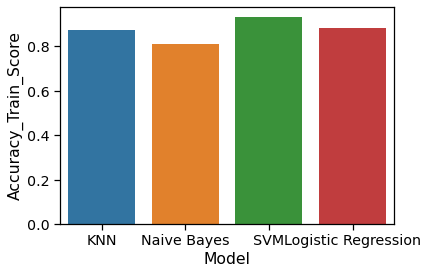

In [433]:
plt.xlabel("Model")
plt.ylabel("Accuracy_Train_Score")
sns.barplot(x=model1,y=train_score)

### 2. For Testing Data

In [434]:
model1= ["KNN","Naive Bayes","SVM","Logistic Regression"]
test_score= [KNN_test_score,NB_test_score,SVM_test_score,LR_test_score]

<AxesSubplot:xlabel='Model', ylabel='Accuracy_Testing_Score'>

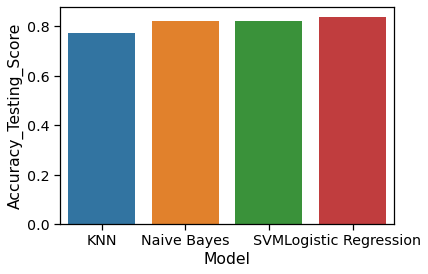

In [435]:
plt.xlabel("Model")
plt.ylabel("Accuracy_Testing_Score")
sns.barplot(x=model1,y=test_score)

# Predict the target values

In [436]:
input_data = (-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0)
input_data_as_numpy_array= np.asarray(input_data) 
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
    print("The person does not have heart disease")
else:
    print("The person has heart disease")
    

[1]
The person has heart disease
